In [1]:
import algos
import bandit
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import utils

plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['figure.dpi'] = 100

DS_NAME = None
N_SWITCHES = 150
N_BANDITS = 5
OPT_SIZE = 2
HORIZON = 250
N_EXPERT = None #None: All possible combinations
N_EXPS = 10 #No. of repeat experiments
GAP_THRESHOLD = min(1,np.sqrt(N_BANDITS*np.log(N_SWITCHES+1)/HORIZON))
kwargs = {'switches_cache_step': 10,
          'gap_constrain':GAP_THRESHOLD*1.05, # 1.05 is small gap, 1.2 for large
          'plot_var': False}
assert kwargs['gap_constrain']>=GAP_THRESHOLD, f"kwargs['gap_constrain'] ({kwargs['gap_constrain']}) must be larger than GAP_THRESHOLD ({GAP_THRESHOLD})"
if N_EXPERT is not None:
    print(f'N_EXPERT = {N_EXPERT}')
    max_n_expert = len(list(combinations(np.arange(N_BANDITS),OPT_SIZE)))
    assert N_EXPERT<=max_n_expert, f"The number of expert ({N_EXPERT}) must be smaller than the maximum combination ({max_n_expert})"
assert N_BANDITS<=HORIZON, f"The number of arm ({N_BANDITS}) must be smaller than the horizon ({HORIZON})"

#EWAmaxStats params
N_UNBIASED_OBS = 1

## Regret vs Number of switches

  0%|          | 0/10 [00:00<?, ?it/s]

Optimal expert index = 9


100%|██████████| 10/10 [04:05<00:00, 24.58s/it]


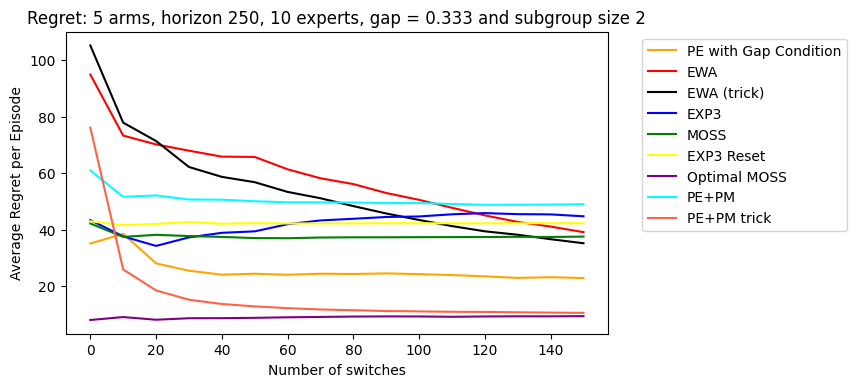

In [2]:
(X, regret_dict, title, xlabel, ylabel) = utils.switches_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, 
                   N_UNBIASED_OBS, OPT_SIZE, N_EXPERT, DS_NAME, **kwargs)
indices = np.arange(0, X.shape[0], kwargs['switches_cache_step']).astype(int)
X = X[indices]
meta_regrets = regret_dict['meta_regrets']
exp3_regrets = regret_dict['exp3_regrets']
moss_regrets = regret_dict['moss_regrets']
exp3_reset_regrets = regret_dict['exp3_reset_regrets']
meta_trick_regrets = regret_dict['meta_trick_regrets']
MetaPElargeGap_regrets = regret_dict['MetaPElargeGap_regrets']
opt_moss_regrets = regret_dict['opt_moss_regrets']
MetaPM_regrets = regret_dict['MetaPM_regrets']
MetaPMtrick_regrets = regret_dict['MetaPMtrick_regrets']
pass

## Regret vs Horizon

  0%|          | 0/10 [00:00<?, ?it/s]

Optimal expert index = 7


100%|██████████| 10/10 [21:08<00:00, 126.86s/it]


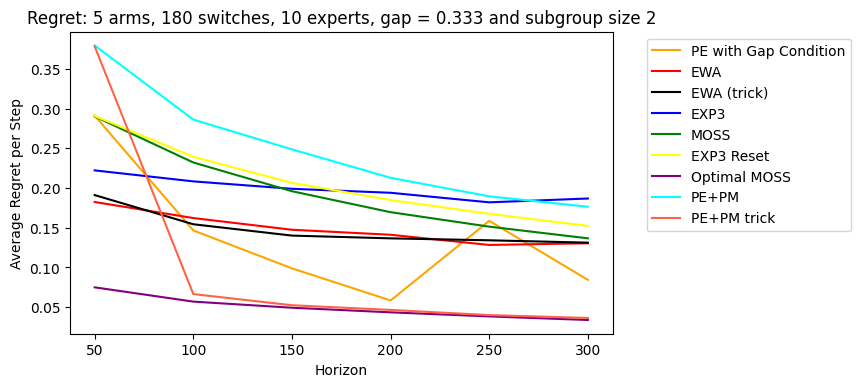

In [3]:
horizon_list = np.arange(50, 310, 50)
n_switches = np.ceil(N_SWITCHES*max(horizon_list)/HORIZON).astype(int)
(X_h, regret_dict_h, title, xlabel, ylabel) = \
utils.horizon_exp(N_EXPS, n_switches, N_BANDITS, N_UNBIASED_OBS, OPT_SIZE, N_EXPERT, 
                  DS_NAME, horizon_list = horizon_list, **kwargs)
pass

## Regret vs # of arm

  0%|          | 0/10 [00:00<?, ?it/s]

Optimal expert index = 2
Optimal expert index = 4
Optimal expert index = 3
Optimal expert index = 10
Optimal expert index = 13


 10%|█         | 1/10 [02:07<19:06, 127.36s/it]

Optimal expert index = 2
Optimal expert index = 5
Optimal expert index = 1
Optimal expert index = 14
Optimal expert index = 2


 20%|██        | 2/10 [04:15<17:04, 128.10s/it]

Optimal expert index = 2
Optimal expert index = 5
Optimal expert index = 5
Optimal expert index = 12
Optimal expert index = 3


 30%|███       | 3/10 [06:24<14:58, 128.29s/it]

Optimal expert index = 1
Optimal expert index = 1
Optimal expert index = 6
Optimal expert index = 6
Optimal expert index = 11


 40%|████      | 4/10 [08:32<12:49, 128.18s/it]

Optimal expert index = 2
Optimal expert index = 1
Optimal expert index = 6
Optimal expert index = 4
Optimal expert index = 16


 50%|█████     | 5/10 [10:38<10:37, 127.45s/it]

Optimal expert index = 2
Optimal expert index = 2
Optimal expert index = 8
Optimal expert index = 11
Optimal expert index = 1


 60%|██████    | 6/10 [12:43<08:26, 126.64s/it]

Optimal expert index = 1
Optimal expert index = 3
Optimal expert index = 8
Optimal expert index = 10
Optimal expert index = 9


 70%|███████   | 7/10 [14:48<06:18, 126.06s/it]

Optimal expert index = 0
Optimal expert index = 2
Optimal expert index = 4
Optimal expert index = 0
Optimal expert index = 18


 80%|████████  | 8/10 [16:53<04:11, 125.76s/it]

Optimal expert index = 2
Optimal expert index = 4
Optimal expert index = 1
Optimal expert index = 1
Optimal expert index = 9


 90%|█████████ | 9/10 [18:58<02:05, 125.53s/it]

Optimal expert index = 2
Optimal expert index = 5
Optimal expert index = 7
Optimal expert index = 13
Optimal expert index = 10


100%|██████████| 10/10 [21:03<00:00, 126.36s/it]


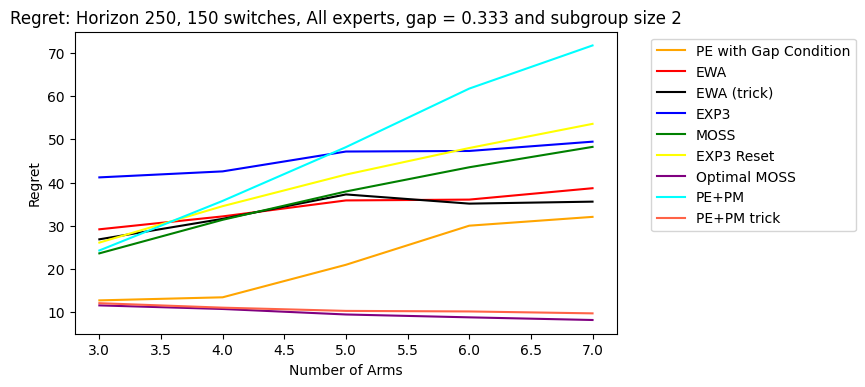

In [4]:
n_bandits_list = np.arange(3,8,1)
(X_b, regret_dict_b, title, xlabel, ylabel) = \
utils.arm_exp(N_EXPS, N_SWITCHES, HORIZON, N_UNBIASED_OBS, 
              OPT_SIZE, N_EXPERT, DS_NAME, n_bandits_list, **kwargs)
pass

## Regret vs subgroup size

  0%|          | 0/10 [00:00<?, ?it/s]

Optimal expert index = 0
Optimal expert index = 9
Optimal expert index = 4
Optimal expert index = 1
Optimal expert index = 0


 10%|█         | 1/10 [02:01<18:12, 121.44s/it]

Optimal expert index = 3
Optimal expert index = 7
Optimal expert index = 6
Optimal expert index = 4
Optimal expert index = 0


 20%|██        | 2/10 [04:01<16:06, 120.85s/it]

Optimal expert index = 0
Optimal expert index = 3
Optimal expert index = 0
Optimal expert index = 0
Optimal expert index = 0


 30%|███       | 3/10 [06:05<14:13, 121.89s/it]

Optimal expert index = 3
Optimal expert index = 6
Optimal expert index = 6
Optimal expert index = 3
Optimal expert index = 0


 40%|████      | 4/10 [08:08<12:15, 122.58s/it]

Optimal expert index = 2
Optimal expert index = 4
Optimal expert index = 4
Optimal expert index = 0
Optimal expert index = 0


 50%|█████     | 5/10 [10:12<10:15, 123.16s/it]

Optimal expert index = 1
Optimal expert index = 4
Optimal expert index = 8
Optimal expert index = 4
Optimal expert index = 0


 60%|██████    | 6/10 [12:16<08:13, 123.36s/it]

Optimal expert index = 0
Optimal expert index = 0
Optimal expert index = 1
Optimal expert index = 4
Optimal expert index = 0


 70%|███████   | 7/10 [14:20<06:10, 123.58s/it]

Optimal expert index = 4
Optimal expert index = 7
Optimal expert index = 2
Optimal expert index = 2
Optimal expert index = 0


 80%|████████  | 8/10 [16:24<04:07, 123.71s/it]

Optimal expert index = 2
Optimal expert index = 0
Optimal expert index = 1
Optimal expert index = 0
Optimal expert index = 0


 90%|█████████ | 9/10 [18:28<02:03, 123.75s/it]

Optimal expert index = 3
Optimal expert index = 5
Optimal expert index = 3
Optimal expert index = 0
Optimal expert index = 0


100%|██████████| 10/10 [20:32<00:00, 123.22s/it]


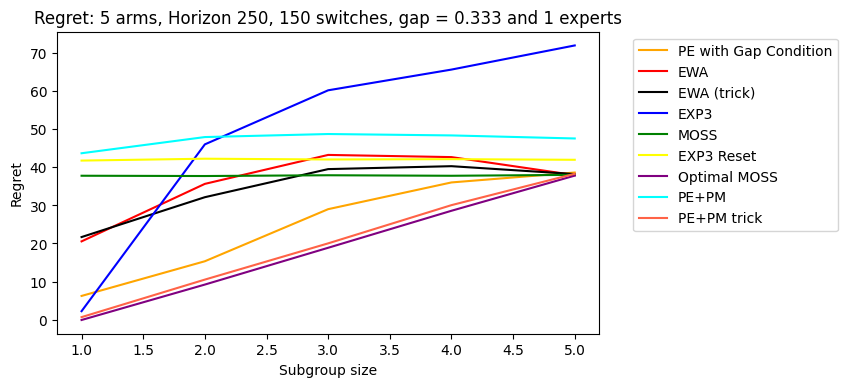

In [5]:
(X_e, regret_dict_e, title, xlabel, ylabel) = utils.subgroup_size_exp(N_EXPS, 
                                  N_SWITCHES, N_BANDITS, HORIZON, N_UNBIASED_OBS, N_EXPERT, DS_NAME, 
                                  opt_size_list = np.arange(1,N_BANDITS+1,1), **kwargs)
pass